In [7]:
import pandas as pd

In [22]:
# load the training set

house_data = pd.read_csv('training.csv')

In [23]:
# delete the index column as we don't need it
del house_data['Unnamed: 0']

In [24]:
# step 1: data exploration

house_data.head()
# house_data.describe()
# house_data.Bath.count(), # count a given column
# house_data.columns
# house_data.EstimatedPrice

# looking for correlations between features
# -ve means negative relationship, +ve means positive relationship
# house_data.corr()

# trying to get a feel of how housesizeinsqft and bath affect the price
# house_data.groupby(['HouseSizeSqft', 'Bath'])['Price'].mean()
# house_data.groupby('Age').mean()

,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice,Price
0,2,5.74,9,3.42,0,2614,2420,59.5,686930,730000
1,1,4.45,9,3.95,0,0,0,93.9,453060,540000
2,1,4.63,9,3.01,0,0,0,78.9,329337,387000
3,3,5.78,8,3.10,131,2614,2596,50.0,399360,390000
4,1,4.38,9,3.60,0,0,0,93.9,444996,394500


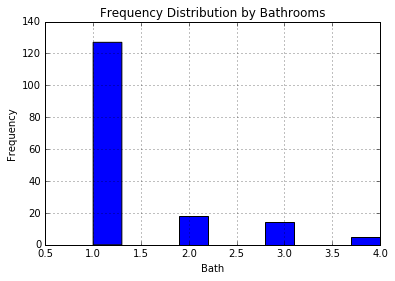

In [25]:
# some visualizations on the data
%matplotlib inline
import matplotlib.pyplot as plt

house_data.Bath.hist()
plt.title('Frequency Distribution by Bathrooms')
plt.xlabel('Bath')
plt.ylabel('Frequency')

# note the frequency numbers are too low, we might have lots of NaN values for bathrooms

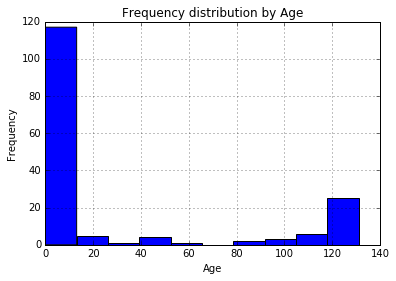

In [20]:
house_data.Age.hist()
plt.title('Frequency distribution by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [26]:
# preparing the data for linear regression

# extract the y-values
house_prices = house_data['Price']
del house_data['Price']

# remove non numeric columns, because the algorithm only works with numeric values. 
# this is not usually ideal because as you imagine all these features have an huge influence on the price of the house
# so we are loosing valuable data

In [27]:
# lets also assume that if a house has NaN for bath, it has one bathroom because surely it should have atleast one
house_data['Bath'] = house_data['Bath'].fillna(1)

In [29]:
# train a linear regression model
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(house_data, house_prices) # talk abit about what's going on here

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
# using the test data set to predict the price of a given house
test_set = pd.read_csv('test.csv')

# delete the index column
del test_set['Unnamed: 0']

# predict the price for a house
test_set.head()

,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
0,3,4.63,9,2.94,121,2614,3432,50.0,611212.0
1,1,3.59,10,3.75,0,0,0,69.4,313950.0
2,3,5.58,11,3.46,0,871,1983,36.1,539955.0
3,1,5.99,9,3.24,0,0,0,69.4,84798.5
4,1,5.65,9,3.42,41,0,0,36.1,294254.0


In [46]:
# predict the price of a house
# test_set.iloc[0]
linear_regression.predict(test_set.iloc[0])

/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 605552.0668851])

In [47]:
# predict prices for all houses
predicted_prices = linear_regression.predict(test_set.iloc[0])

/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [50]:
# load test data with actual valid prices
actual_prices_for_test_data = pd.read_csv('test_with_actual_price.csv').Price

# model evaluation, how do we know if our predictions are correct?
linear_regression.score(test_set, actual_prices_for_test_data)

# a score that is close means that our predictions have a high degree of accuracy

0.9639247890471645

In [ ]:
# To keep this lab short, 
# i removed non numeric columns, because the LinearRegression algorithm only works with numeric values as input. 
# this is not usually ideal because as you can imagine all these features have a huge influence on the price of the house
# so we are loosing valuable data

# normally we would encode them numeric values